# Sendy Logistics Challenge - ML Prediction
This challenge not only aims to enhance logistical efficiency but also seeks to create more accessible and affordable delivery solutions for businesses in Africa. A successful submission will significantly contribute to improving logistics in the region.

## Project Overview
The Sendy Logistics Challenge focuses on predicting the estimated time of arrival (ETA) for motorbike deliveries in Nairobi. The aim is to improve the efficiency of logistics in Sub-Saharan Africa, where high transportation costs can significantly impact the economy.

**Overview**
- **Purpose:** Predict delivery times from the moment a driver picks up a package until it reaches the destination.
- **Goal:** Enhance customer communication, improve service reliability, and achieve cost savings through better resource management.

## Problem Statement
The problem statement for this project involves addressing the challenge of optimizing energy usage across telecom sites powered by multiple sources: grid, diesel, and solar energy. The task requires developing a machine-learning model capable of predicting the optimal energy source at each time step while minimizing overall costs. Additionally, the solution must maintain battery capacity above a set threshold to ensure continuous operation. The problem is complex due to the fluctuating availability of renewable energy and varying energy costs, requiring a robust strategy for cost-effective energy allocation.

## Dataset
**[Data](https://zindi.africa/competitions/sendy-logistics-challenge) Description**
- **Training Dataset:** A subset of over 20,000 direct orders for motorbike deliveries, fully anonymized with weather data included.
- **Files Provided:**
    - Train.csv: Data for training your model.
    - Test.csv: Data for testing your model.
    - Riders.csv: Information about unique riders, including their performance metrics.
    - VariableDefinitions.csv: Definitions for the variables used in the datasets.

**Key Variables in Datasets**
- **Order Details:**
    - Order No: Unique identifier for each order.
    - User Id: Unique identifier for each customer.
    - Vehicle Type: Currently limited to bikes.
    - Other features relevant to the delivery context, such as pickup and drop-off locations, times, and rider metrics.


## Install Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
# display all columns in a dataframe
pd.set_option('display.max_columns', None)

## Data Collection and Processing

In [3]:
train_df = pd.read_csv('/kaggle/input/sendy-data/Train.csv')

train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [4]:
train_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [5]:
test_df = pd.read_csv('/kaggle/input/sendy-data/Test (2).csv')

test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [6]:
test_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Distance (KM)', 'Temperature', 'Precipitation in millimeters',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id'],
      dtype='object')

In [7]:
riders_df = pd.read_csv('/kaggle/input/sendy-data/Riders.csv')

riders_df.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


In [8]:
variable_definitions_df = pd.read_csv('/kaggle/input/sendy-data/VariableDefinitions.csv')

variable_definitions_df.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


In [9]:
sample_submission_df = pd.read_csv('/kaggle/input/sendy-data/SampleSubmission.csv')

sample_submission_df.head()

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0
1,Order_No_12736,4903.0
2,Order_No_768,5649.0
3,Order_No_15332,NaN
4,Order_No_21373,NaN


In [10]:
# Merge the riders dataset
train_df = train_df.merge(riders_df, on='Rider Id', how='left')
test_df = test_df.merge(riders_df, on='Rider Id', how='left')

In [11]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,2,12:53:03 PM,30,2,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,5,9:43:06 AM,15,5,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,1,10:05:23 AM,13,1,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [12]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,12:59:17 PM,17,5,1:20:27 PM,17,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,11:25:05 AM,27,4,11:33:20 AM,27,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,1:53:27 PM,17,1,2:02:41 PM,17,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,11:34:45 AM,11,2,11:47:19 AM,11,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


In [13]:
train_df.shape

(21201, 33)

In [14]:
train_df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947,1692.423706,984.742842,13.882520,341.067119
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788,1574.308302,646.652835,0.916071,402.867746
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,2.000000,96.000000,0.000000,0.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000,557.000000,495.000000,13.600000,61.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,1212.000000,872.000000,14.000000,161.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,2311.000000,1236.000000,14.300000,495.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,9756.000000,3764.000000,15.200000,2298.000000


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

**Handle missing data**

Handle missing data on training data

In [16]:
train_df.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [17]:
train_df.drop('Precipitation in millimeters', axis='columns', inplace=True)
train_df['Temperature'].fillna(method='ffill', inplace=True)
train_df['Temperature'].fillna(method='bfill', inplace=True)

train_df.isnull().sum()

/tmp/ipykernel_36/3814745733.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Temperature'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_36/3814745733.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df['Temperature'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_36/3814745733.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

Handle missing data on testing data

In [18]:
test_df.isnull().sum()

Order No                                   0
User Id                                    0
Vehicle Type                               0
Platform Type                              0
Personal or Business                       0
Placement - Day of Month                   0
Placement - Weekday (Mo = 1)               0
Placement - Time                           0
Confirmation - Day of Month                0
Confirmation - Weekday (Mo = 1)            0
Confirmation - Time                        0
Arrival at Pickup - Day of Month           0
Arrival at Pickup - Weekday (Mo = 1)       0
Arrival at Pickup - Time                   0
Pickup - Day of Month                      0
Pickup - Weekday (Mo = 1)                  0
Pickup - Time                              0
Distance (KM)                              0
Temperature                             1437
Precipitation in millimeters            6869
Pickup Lat                                 0
Pickup Long                                0
Destinatio

In [19]:
test_df.drop('Precipitation in millimeters', axis='columns', inplace=True)
test_df['Temperature'].fillna(method='ffill', inplace=True)
test_df['Temperature'].fillna(method='bfill', inplace=True)

test_df.isnull().sum()

/tmp/ipykernel_36/1166848504.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Temperature'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_36/1166848504.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df['Temperature'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_36/1166848504.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace meth

Order No                                0
User Id                                 0
Vehicle Type                            0
Platform Type                           0
Personal or Business                    0
Placement - Day of Month                0
Placement - Weekday (Mo = 1)            0
Placement - Time                        0
Confirmation - Day of Month             0
Confirmation - Weekday (Mo = 1)         0
Confirmation - Time                     0
Arrival at Pickup - Day of Month        0
Arrival at Pickup - Weekday (Mo = 1)    0
Arrival at Pickup - Time                0
Pickup - Day of Month                   0
Pickup - Weekday (Mo = 1)               0
Pickup - Time                           0
Distance (KM)                           0
Temperature                             0
Pickup Lat                              0
Pickup Long                             0
Destination Lat                         0
Destination Long                        0
Rider Id                          

## Feature Engineering

Feature engineering on Train data

In [20]:
# Creating datetime features
train_df['Placement - Time'] = pd.to_datetime(train_df['Placement - Time'])
train_df['Confirmation - Time'] = pd.to_datetime(train_df['Confirmation - Time'])
train_df['Arrival at Pickup - Time'] = pd.to_datetime(train_df['Arrival at Pickup - Time'])
train_df['Pickup - Time'] = pd.to_datetime(train_df['Pickup - Time'])
train_df['Distance (KM)'] = train_df['Distance (KM)'].astype(float)

/tmp/ipykernel_36/4174022071.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Placement - Time'] = pd.to_datetime(train_df['Placement - Time'])
/tmp/ipykernel_36/4174022071.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Confirmation - Time'] = pd.to_datetime(train_df['Confirmation - Time'])
/tmp/ipykernel_36/4174022071.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival at Pickup - Time'] = pd.to_datetime(train_df['Arrival at Pickup - Time'])
/tmp/ipykernel_36/4174022071.py:5: UserWarning: Could not infer format, so each element

In [21]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,2024-09-23 09:35:46,9,5,2024-09-23 09:40:10,9,5,2024-09-23 10:04:47,9,5,2024-09-23 10:27:30,9,5,10:39:55 AM,4.0,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,2024-09-23 11:16:16,12,5,2024-09-23 11:23:21,12,5,2024-09-23 11:40:22,12,5,2024-09-23 11:44:09,12,5,12:17:22 PM,16.0,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,2024-09-23 12:39:25,30,2,2024-09-23 12:42:44,30,2,2024-09-23 12:49:34,30,2,2024-09-23 12:53:03,30,2,1:00:38 PM,3.0,26.4,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,2024-09-23 09:25:34,15,5,2024-09-23 09:26:05,15,5,2024-09-23 09:37:56,15,5,2024-09-23 09:43:06,15,5,10:05:27 AM,9.0,19.2,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,2024-09-23 09:55:18,13,1,2024-09-23 09:56:18,13,1,2024-09-23 10:03:53,13,1,2024-09-23 10:05:23,13,1,10:25:37 AM,9.0,15.4,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533


In [22]:
# Calculate additional features
train_df['Placement - Hour'] = train_df['Placement - Time'].dt.hour
train_df['Pickup - Hour'] = train_df['Pickup - Time'].dt.hour
train_df['Time Diff - Pickup to Arrival'] = (train_df['Arrival at Pickup - Time'] - train_df['Pickup - Time'])


train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement - Hour,Pickup - Hour,Time Diff - Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,2024-09-23 09:35:46,9,5,2024-09-23 09:40:10,9,5,2024-09-23 10:04:47,9,5,2024-09-23 10:27:30,9,5,10:39:55 AM,4.0,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,9,10,-1 days +23:37:17
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,2024-09-23 11:16:16,12,5,2024-09-23 11:23:21,12,5,2024-09-23 11:40:22,12,5,2024-09-23 11:44:09,12,5,12:17:22 PM,16.0,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69,11,11,-1 days +23:56:13
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,2024-09-23 12:39:25,30,2,2024-09-23 12:42:44,30,2,2024-09-23 12:49:34,30,2,2024-09-23 12:53:03,30,2,1:00:38 PM,3.0,26.4,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114,12,12,-1 days +23:56:31
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,2024-09-23 09:25:34,15,5,2024-09-23 09:26:05,15,5,2024-09-23 09:37:56,15,5,2024-09-23 09:43:06,15,5,10:05:27 AM,9.0,19.2,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113,9,9,-1 days +23:54:50
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,2024-09-23 09:55:18,13,1,2024-09-23 09:56:18,13,1,2024-09-23 10:03:53,13,1,2024-09-23 10:05:23,13,1,10:25:37 AM,9.0,15.4,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533,9,10,-1 days +23:58:30


Feature engineering on Train data

In [23]:
# Creating datetime features
test_df['Placement - Time'] = pd.to_datetime(test_df['Placement - Time'])
test_df['Confirmation - Time'] = pd.to_datetime(test_df['Confirmation - Time'])
test_df['Arrival at Pickup - Time'] = pd.to_datetime(test_df['Arrival at Pickup - Time'])
test_df['Pickup - Time'] = pd.to_datetime(test_df['Pickup - Time'])
test_df['Distance (KM)'] = test_df['Distance (KM)'].astype(float)

/tmp/ipykernel_36/1448364573.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Placement - Time'] = pd.to_datetime(test_df['Placement - Time'])
/tmp/ipykernel_36/1448364573.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Confirmation - Time'] = pd.to_datetime(test_df['Confirmation - Time'])
/tmp/ipykernel_36/1448364573.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Arrival at Pickup - Time'] = pd.to_datetime(test_df['Arrival at Pickup - Time'])
/tmp/ipykernel_36/1448364573.py:5: UserWarning: Could not infer format, so each element will 

In [24]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,2024-09-23 16:44:10,27,3,2024-09-23 16:44:29,27,3,2024-09-23 16:53:04,27,3,2024-09-23 17:06:47,8.0,22.8,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,2024-09-23 12:57:35,17,5,2024-09-23 12:59:17,17,5,2024-09-23 13:20:27,17,5,2024-09-23 13:25:37,5.0,22.8,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,2024-09-23 11:08:14,27,4,2024-09-23 11:25:05,27,4,2024-09-23 11:33:20,27,4,2024-09-23 11:57:54,5.0,22.8,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,2024-09-23 13:51:35,17,1,2024-09-23 13:53:27,17,1,2024-09-23 14:02:41,17,1,2024-09-23 14:16:52,5.0,24.5,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,2024-09-23 11:30:28,11,2,2024-09-23 11:34:45,11,2,2024-09-23 11:47:19,11,2,2024-09-23 11:56:04,6.0,24.4,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010


In [25]:
# Calculate additional features
test_df['Placement - Hour'] = test_df['Placement - Time'].dt.hour
test_df['Pickup - Hour'] = test_df['Pickup - Time'].dt.hour
test_df['Time Diff - Pickup to Arrival'] = (test_df['Arrival at Pickup - Time'] - train_df['Pickup - Time'])


test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement - Hour,Pickup - Hour,Time Diff - Pickup to Arrival
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,2024-09-23 16:44:10,27,3,2024-09-23 16:44:29,27,3,2024-09-23 16:53:04,27,3,2024-09-23 17:06:47,8.0,22.8,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171,16,17,0 days 06:25:34
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,2024-09-23 12:57:35,17,5,2024-09-23 12:59:17,17,5,2024-09-23 13:20:27,17,5,2024-09-23 13:25:37,5.0,22.8,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45,12,13,0 days 01:36:18
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,2024-09-23 11:08:14,27,4,2024-09-23 11:25:05,27,4,2024-09-23 11:33:20,27,4,2024-09-23 11:57:54,5.0,22.8,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67,11,11,-1 days +22:40:17
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,2024-09-23 13:51:35,17,1,2024-09-23 13:53:27,17,1,2024-09-23 14:02:41,17,1,2024-09-23 14:16:52,5.0,24.5,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44,13,14,0 days 04:19:35
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,2024-09-23 11:30:28,11,2,2024-09-23 11:34:45,11,2,2024-09-23 11:47:19,11,2,2024-09-23 11:56:04,6.0,24.4,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010,11,11,0 days 01:41:56


## Exploratory Data Analysis

In [26]:
train_df.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
       'Rider Id', 'Time from Pickup to Arrival', 'No_Of_Orders', 'Age',
       'Average_Rating', 'No_of_Ratings', 'Placement - Hour', 'Pickup - Hour',
       'Time Diff - Pickup to Arrival'],
      dtype='object')

### Correlation Hypothesis

**1. Distance (KM) vs. Time Diff - Pickup to Arrival**
- *Hypothesis:* The longer the distance (in km) between the pickup and destination, the longer the time difference between pickup and arrival.
- *Rationale:* It is intuitive that the travel time will increase with the distance, so a positive correlation is expected.

**2. Temperature vs. Time Diff - Pickup to Arrival**
- *Hypothesis:* Higher temperatures might lead to longer travel times due to factors such as increased traffic or vehicle performance issues.
- *Rationale:* In some regions, higher temperatures can negatively impact road conditions or cause mechanical problems, potentially leading to longer travel times.

**3. Average Rating vs. Time from Pickup to Arrival**
- *Hypothesis:* Riders with higher average ratings might have shorter pickup-to-arrival times due to better route planning or more efficient driving.
- *Rationale:* More experienced or skilled riders may receive higher ratings and could complete deliveries more quickly.

**4. No_Of_Orders vs. Time from Pickup to Arrival**
- *Hypothesis:* Riders who have more orders might have longer pickup-to-arrival times due to increased workload and potential delays.
- *Rationale:* Managing multiple orders simultaneously could lead to delays in delivery times, as riders may need to handle multiple pickups and drop-offs.

**5. Pickup - Hour vs. Time Diff - Pickup to Arrival**
- *Hypothesis:* The time of pickup (hour of the day) might correlate with the time difference from pickup to arrival, with peak hours possibly leading to longer travel times.
- *Rationale:* During rush hours, traffic congestion might increase, leading to longer delivery times.

**6. Age vs. Average Rating**
- *Hypothesis:* There might be a correlation between the age of the rider and their average rating.
- *Rationale:* Age could potentially correlate with experience or behavior, which might be reflected in the rider’s ratings.


**Correlation Matrix**

In [27]:
numeric_df = train_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement - Hour,Pickup - Hour,Time Diff - Pickup to Arrival
Platform Type,1.000000,0.012764,-0.058038,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.012770,-0.058005,0.005528,0.190155,-0.002742,0.021327,0.006319,0.043924,-0.003827,0.024060,-0.074029,-0.014664,-0.031886,-0.024730,-0.023275,-0.053344
Placement - Day of Month,0.012764,1.000000,0.026148,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,0.999998,0.026122,-0.007585,0.015589,-0.004929,-0.005453,0.007541,0.002077,-0.014710,0.008096,-0.000107,0.012790,-0.001709,0.008670,0.006267,-0.003164
Placement - Weekday (Mo = 1),-0.058038,0.026148,1.000000,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.026132,0.999952,0.003582,0.027967,-0.000918,0.011008,-0.004299,-0.000875,0.009693,-0.024226,-0.015475,-0.006834,-0.025747,-0.008759,-0.003912,-0.014198
Confirmation - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.015590,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,0.008672,0.006270,-0.003167
Confirmation - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027976,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768,-0.008748,-0.003896,-0.014216
Arrival at Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.015590,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,0.008672,0.006270,-0.003167
Arrival at Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027976,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768,-0.008748,-0.003896,-0.014216
Pickup - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.015590,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,0.008672,0.006270,-0.003167
Pickup - Weekday (Mo = 1),-0.058005,0.026122,0.999952,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.003574,0.027976,-0.000883,0.011036,-0.004251,-0.000900,0.009744,-0.024205,-0.015514,-0.006803,-0.025768,-0.008748,-0.003896,-0.014216
Arrival at Destination - Day of Month,0.012770,0.999998,0.026132,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,1.000000,0.026123,-0.007587,0.015590,-0.004923,-0.005448,0.007550,0.002073,-0.014701,0.008099,-0.000114,0.012796,-0.001712,0.008672,0.006270,-0.003167


**Hypothesis Testing: Pearson Correlation**

In [28]:
# Convert 'Time Diff - Pickup to Arrival' to numeric (seconds)
train_df['Time Diff - Pickup to Arrival (Seconds)'] = train_df['Time Diff - Pickup to Arrival'].dt.total_seconds()

# Hypothesis 1: Distance (KM) vs. Time Diff - Pickup to Arrival
corr_distance_time, _ = pearsonr(train_df['Distance (KM)'], train_df['Time Diff - Pickup to Arrival (Seconds)'])
print(f"Correlation between Distance (KM) and Time Diff - Pickup to Arrival: {corr_distance_time}")

# Hypothesis 2: Temperature vs. Time Diff - Pickup to Arrival
corr_temp_time, _ = pearsonr(train_df['Temperature'], train_df['Time Diff - Pickup to Arrival (Seconds)'])
print(f"Correlation between Temperature and Time Diff - Pickup to Arrival: {corr_temp_time}")

# Hypothesis 3: Average Rating vs. Time from Pickup to Arrival
corr_rating_time, _ = pearsonr(train_df['Average_Rating'], train_df['Time from Pickup to Arrival'])
print(f"Correlation between Average Rating and Time from Pickup to Arrival: {corr_rating_time}")

# Hypothesis 4: No_Of_Orders vs. Time from Pickup to Arrival
corr_orders_time, _ = pearsonr(train_df['No_Of_Orders'], train_df['Time from Pickup to Arrival'])
print(f"Correlation between No_Of_Orders and Time from Pickup to Arrival: {corr_orders_time}")

# Hypothesis 5: Pickup - Hour vs. Time Diff - Pickup to Arrival
corr_pickup_hour_time, _ = pearsonr(train_df['Pickup - Hour'], train_df['Time Diff - Pickup to Arrival (Seconds)'])
print(f"Correlation between Pickup - Hour and Time Diff - Pickup to Arrival: {corr_pickup_hour_time}")

# Hypothesis 6: Age vs. Average Rating
corr_age_rating, _ = pearsonr(train_df['Age'], train_df['Average_Rating'])
print(f"Correlation between Age and Average Rating: {corr_age_rating}")

Correlation between Distance (KM) and Time Diff - Pickup to Arrival: -0.10304433882478047
Correlation between Temperature and Time Diff - Pickup to Arrival: -0.03398167691428148
Correlation between Average Rating and Time from Pickup to Arrival: -0.04255939617977873
Correlation between No_Of_Orders and Time from Pickup to Arrival: -0.041607933492114356
Correlation between Pickup - Hour and Time Diff - Pickup to Arrival: -0.02154821805385969
Correlation between Age and Average Rating: -0.014348065207553934


**Results Interpretation**

**1. Distance (KM) vs. Time Diff - Pickup to Arrival: -0.103**
- Interpretation: There is a weak negative correlation between the distance traveled and the time difference from pickup to arrival. This suggests that as the distance increases, the time difference slightly decreases, but the relationship is very weak.

**2. Temperature vs. Time Diff - Pickup to Arrival: -0.034**
- Interpretation: There is an almost negligible negative correlation between temperature and the time difference from pickup to arrival. This indicates that temperature has very little influence on the time difference.

**3. Average Rating vs. Time from Pickup to Arrival: -0.043**
- Interpretation: There is a very weak negative correlation between the rider's average rating and the time taken from pickup to arrival. This suggests that riders with higher ratings tend to complete deliveries slightly faster, but the relationship is extremely weak.

**4. No_Of_Orders vs. Time from Pickup to Arrival: -0.042**
- Interpretation: There is a very weak negative correlation between the number of orders a rider has and the time taken from pickup to arrival. This implies that riders with more orders might complete deliveries slightly faster, but the correlation is minimal.

**5. Pickup - Hour vs. Time Diff - Pickup to Arrival: -0.022**
- Interpretation: There is an almost negligible negative correlation between the hour of pickup and the time difference from pickup to arrival. This means that the time of day has very little impact on the delivery time.

**6. Age vs. Average Rating: -0.014**
- Interpretation: There is a very weak negative correlation between a rider's age and their average rating. This suggests that older or younger riders do not significantly differ in terms of their ratings.

All the correlations found are very close to zero, indicating weak or negligible linear relationships between the pairs of variables.

**Visualizing Correlations**

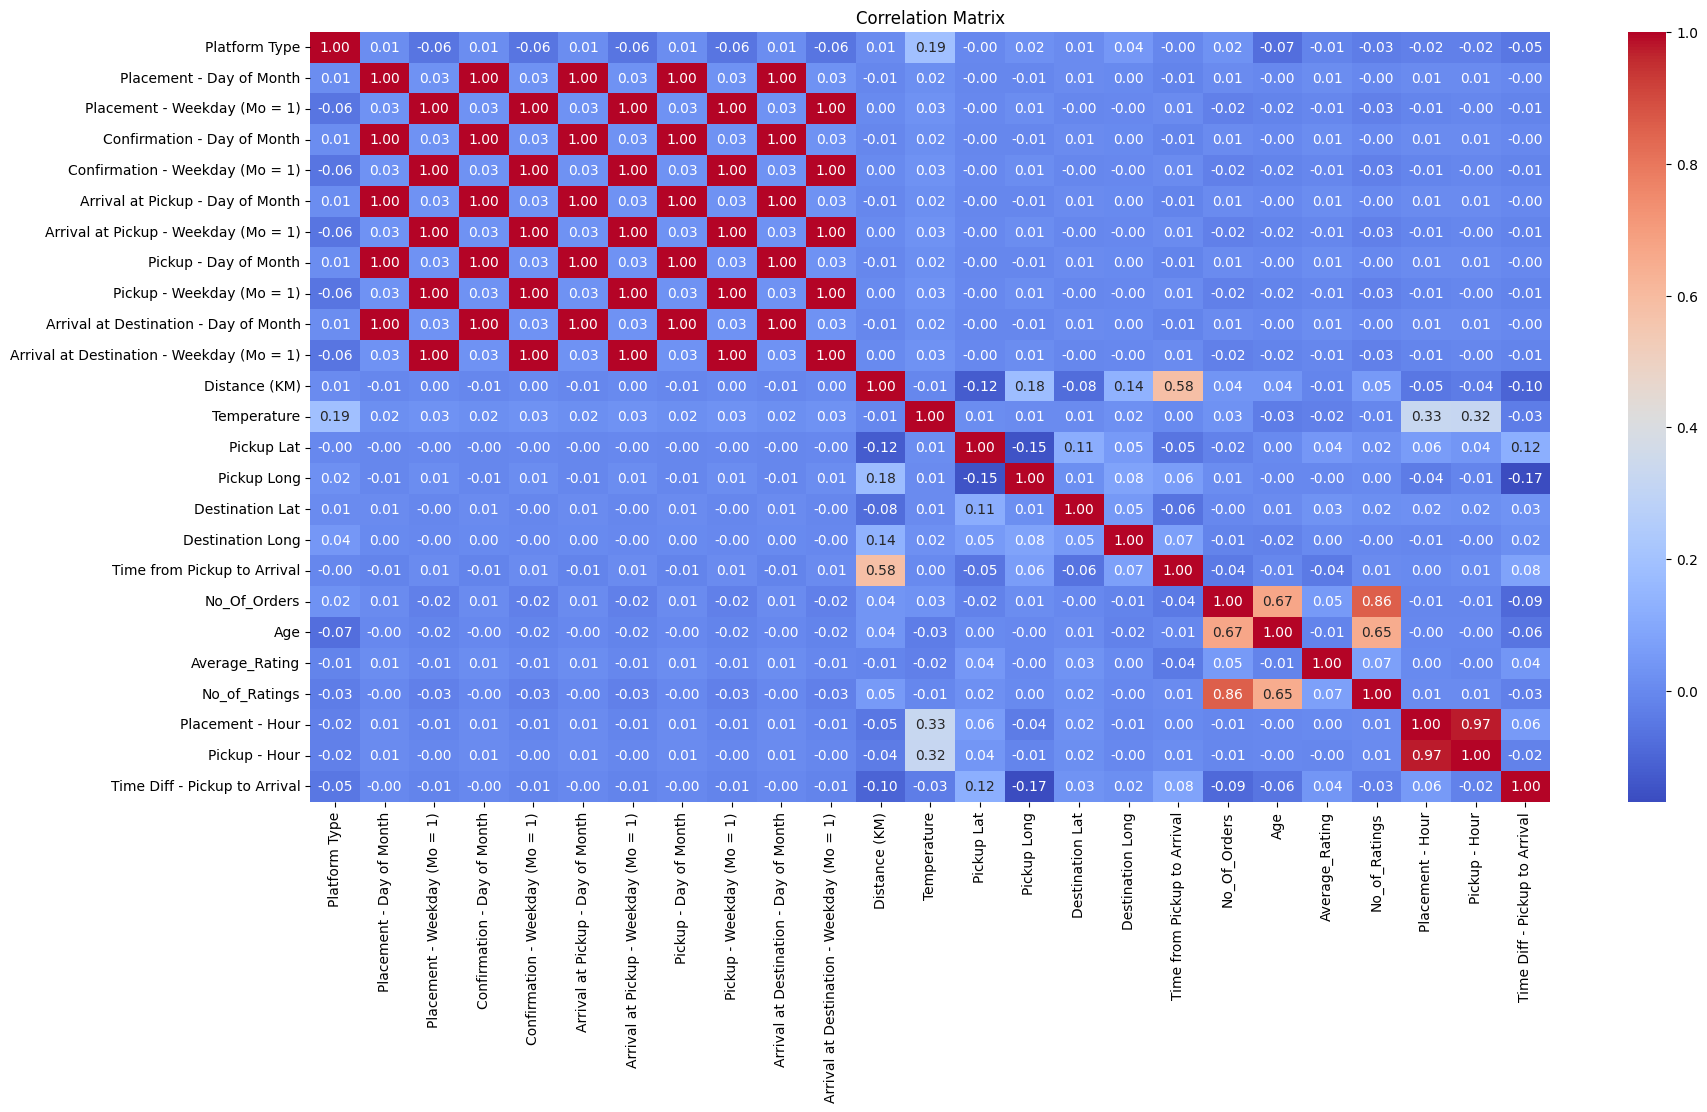

In [29]:
# Correlation Matrix heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Visualizations

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


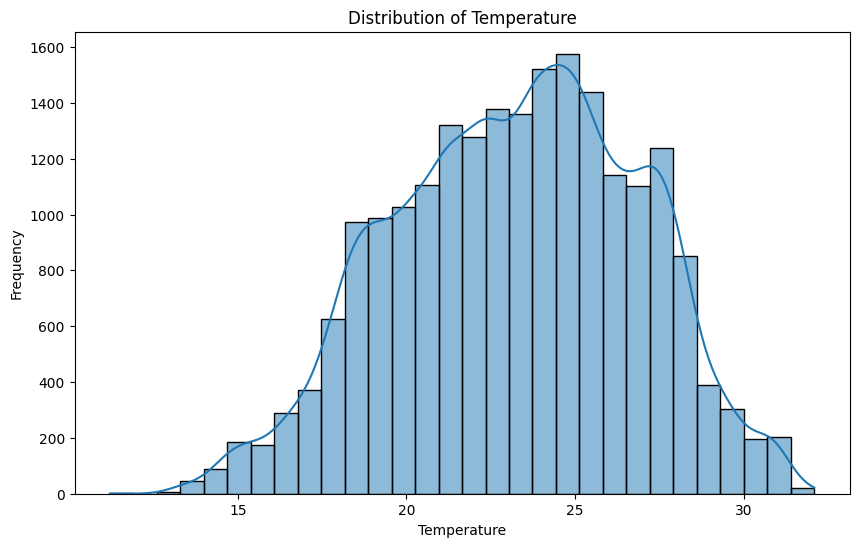

In [30]:
# Plot a Histogram of Temperature
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


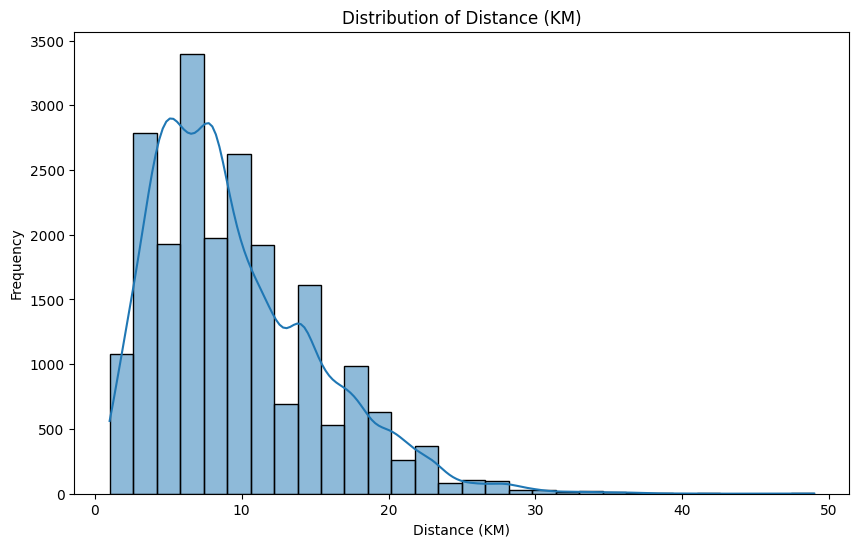

In [31]:
# Plot a Histogram of Distance(km)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Distance (KM)'], bins=30, kde=True)
plt.title('Distribution of Distance (KM)')
plt.xlabel('Distance (KM)')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the mar

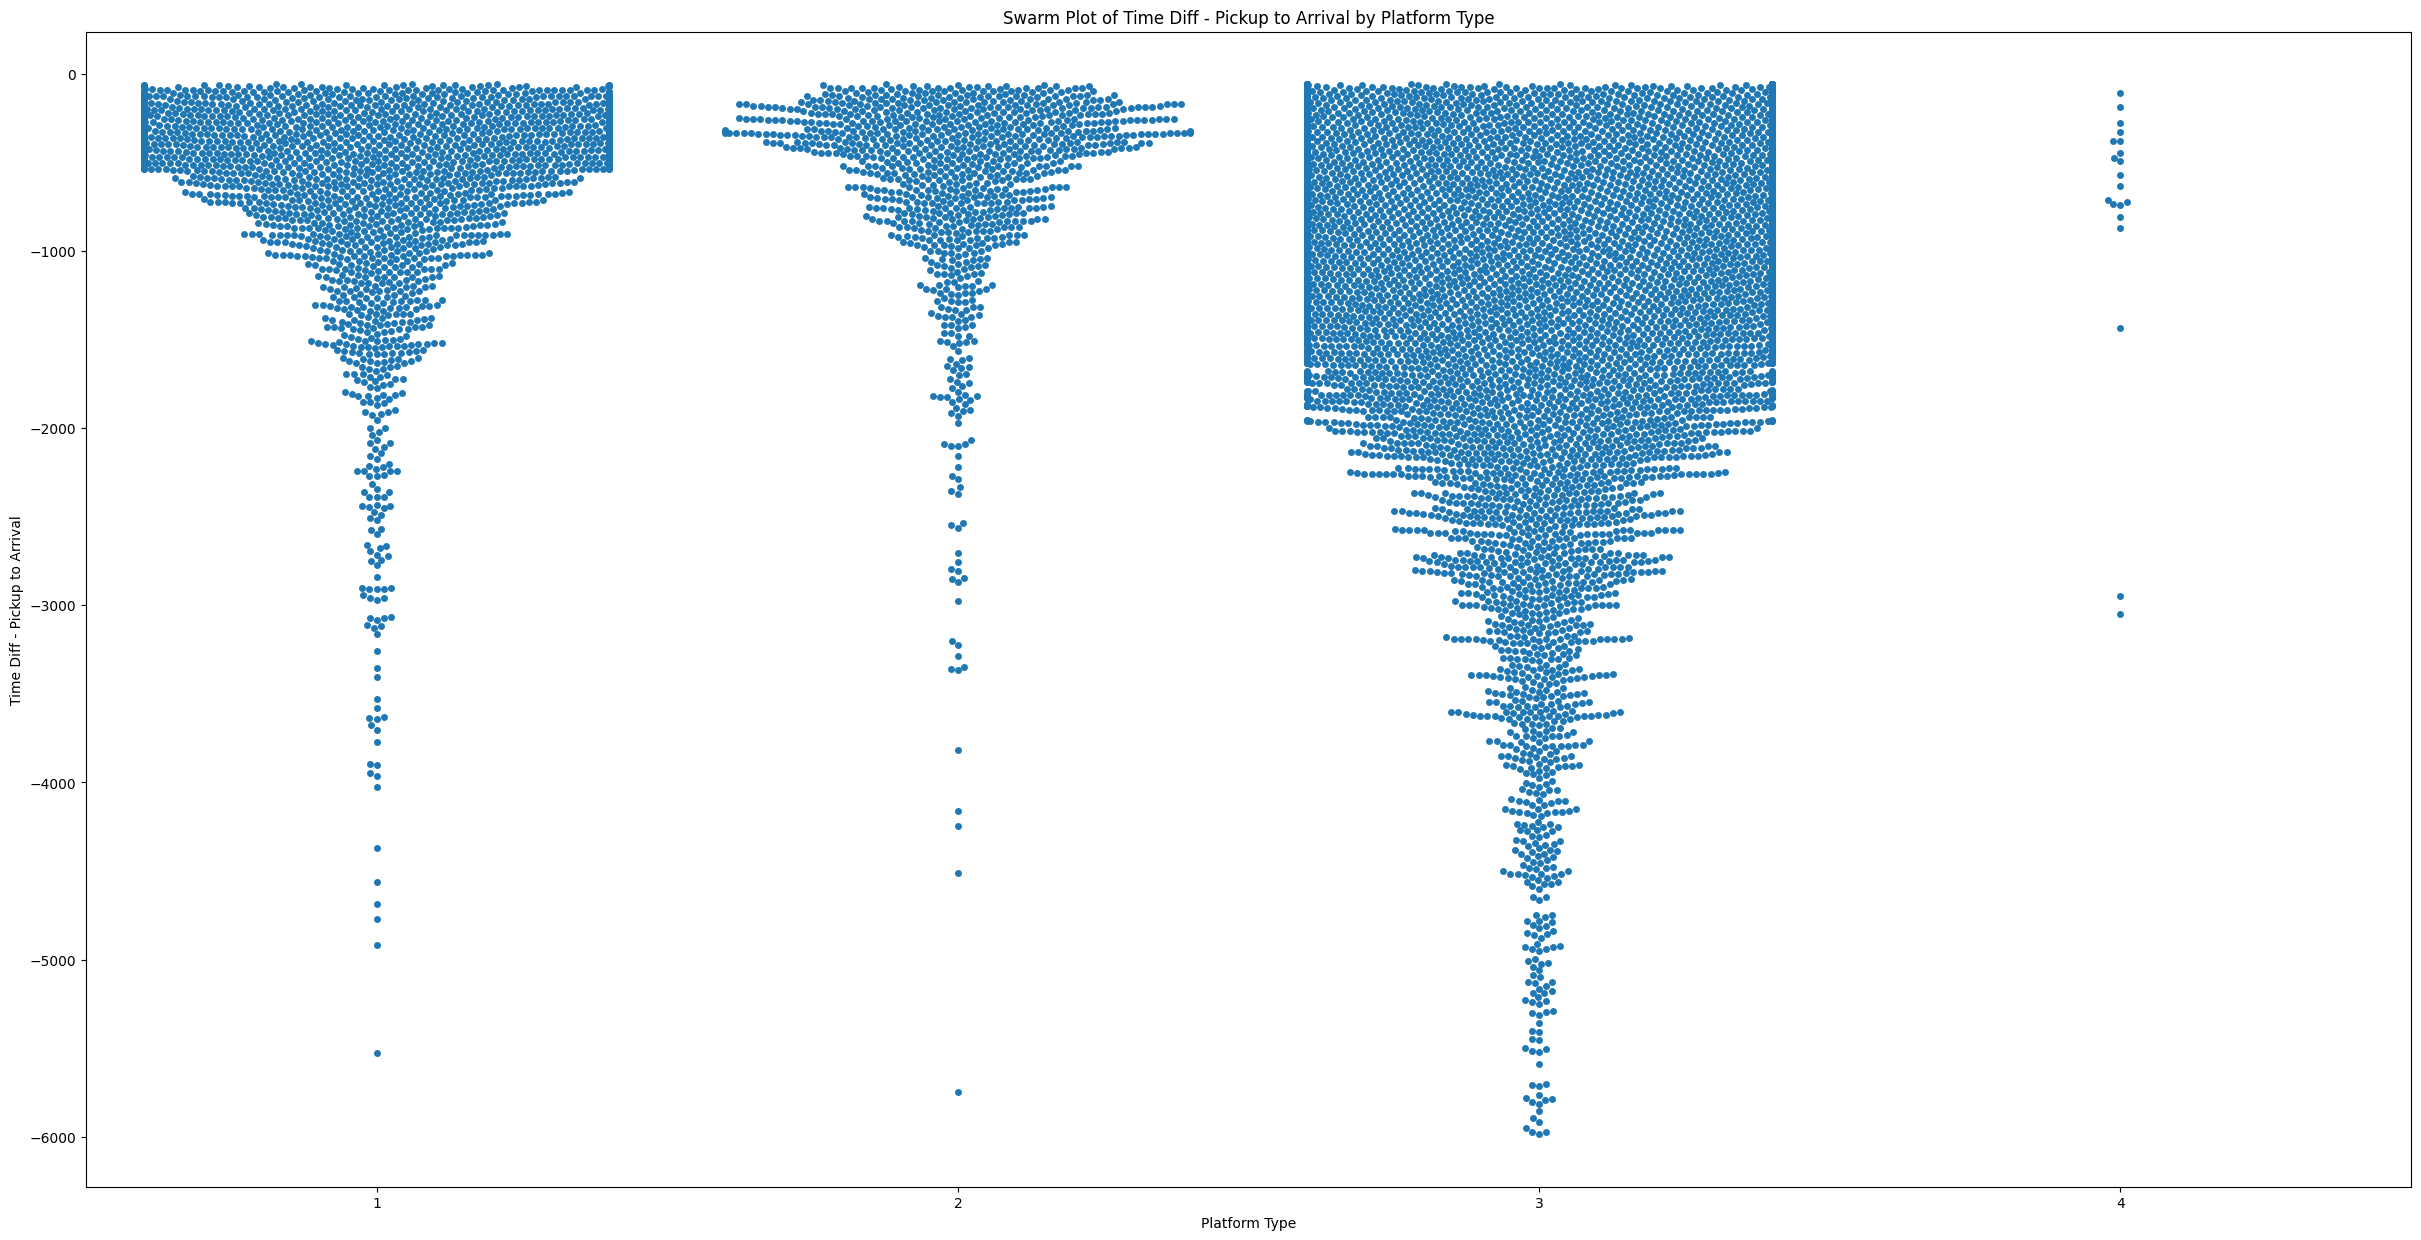

In [32]:
# Convert 'Time Diff - Pickup to Arrival' to numeric (seconds)
train_df['Time Diff - Pickup to Arrival (Seconds)'] = train_df['Time Diff - Pickup to Arrival'].dt.total_seconds()

plt.figure(figsize=(30, 15))
sns.swarmplot(x='Platform Type', y='Time Diff - Pickup to Arrival (Seconds)', data=train_df)
plt.title('Swarm Plot of Time Diff - Pickup to Arrival by Platform Type')
plt.xlabel('Platform Type')
plt.ylabel('Time Diff - Pickup to Arrival')
plt.show()


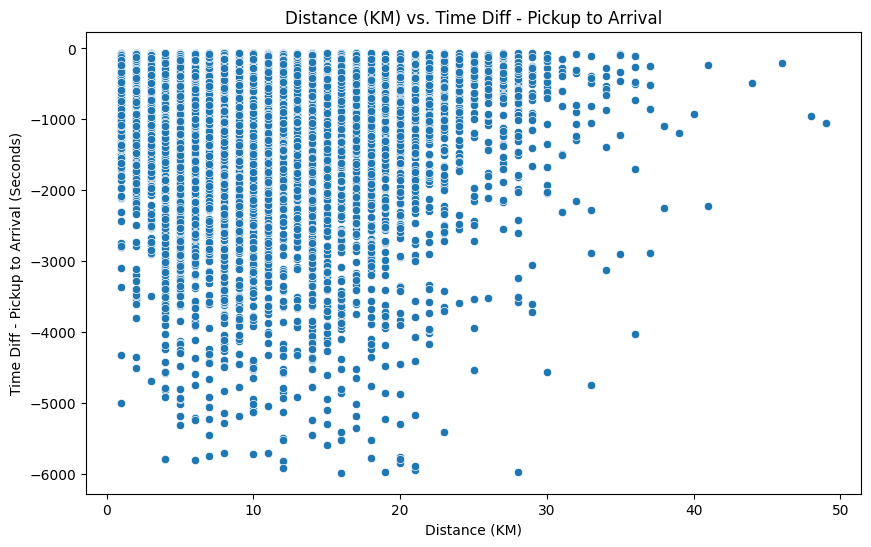

In [33]:
# Convert 'Time Diff - Pickup to Arrival' to numeric (seconds)
train_df['Time Diff - Pickup to Arrival (Seconds)'] = train_df['Time Diff - Pickup to Arrival'].dt.total_seconds()

# Plot a scatter plot of Distance (KM) vs. Time Diff - Pickup to Arrival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance (KM)', y='Time Diff - Pickup to Arrival (Seconds)', data=train_df)
plt.title('Distance (KM) vs. Time Diff - Pickup to Arrival')
plt.xlabel('Distance (KM)')
plt.ylabel('Time Diff - Pickup to Arrival (Seconds)')
plt.show()

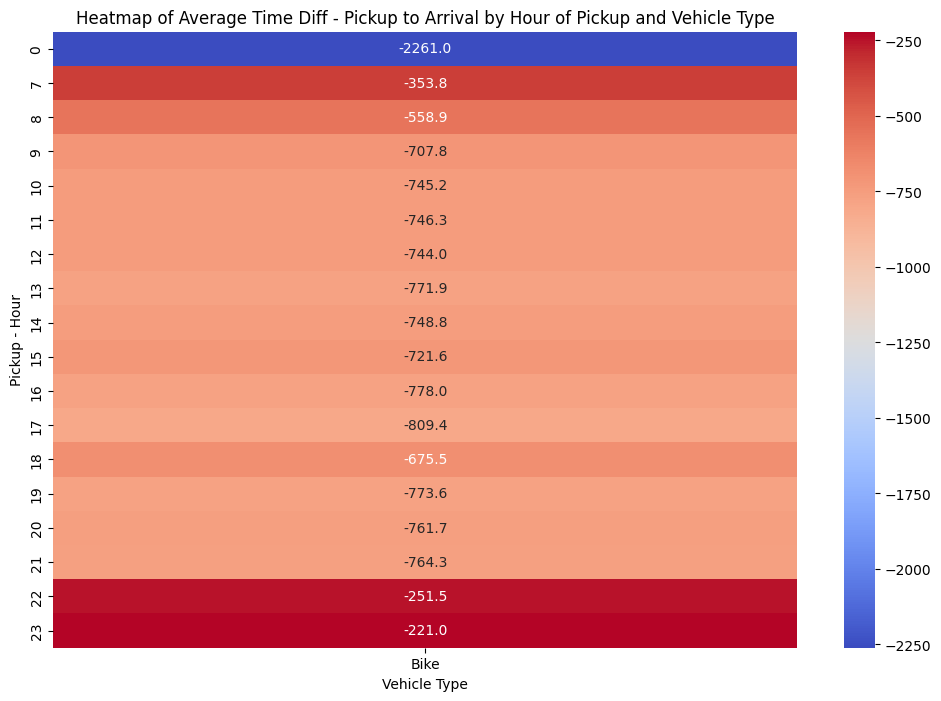

In [34]:
# Heatmap of Average Time Diff - Pickup to Arrival by Hour of Pickup and Vehicle Type
# Convert 'Time Diff - Pickup to Arrival' from timedelta to total seconds
train_df['Time Diff - Pickup to Arrival (Seconds)'] = train_df['Time Diff - Pickup to Arrival'].dt.total_seconds()


# Create pivot table for heatmap
pivot_table = train_df.pivot_table(
    values='Time Diff - Pickup to Arrival (Seconds)', 
    index='Pickup - Hour', 
    columns='Vehicle Type', 
    aggfunc='mean'
)


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Heatmap of Average Time Diff - Pickup to Arrival by Hour of Pickup and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Pickup - Hour')
plt.show()


## Feature Engineering

In [35]:
# Creating datetime features for training set
train_df['Placement - Time'] = pd.to_datetime(train_df['Placement - Time'])
train_df['Confirmation - Time'] = pd.to_datetime(train_df['Confirmation - Time'])
train_df['Arrival at Pickup - Time'] = pd.to_datetime(train_df['Arrival at Pickup - Time'])
train_df['Pickup - Time'] = pd.to_datetime(train_df['Pickup - Time'])
train_df['Distance (KM)'] = train_df['Distance (KM)'].astype(float)

# Calculate additional features
train_df['Placement_hour'] = train_df['Placement - Time'].dt.hour
train_df['Pickup_hour'] = train_df['Pickup - Time'].dt.hour
train_df['Time_diff_Pickup_to_Arrival'] = (train_df['Arrival at Pickup - Time'] - train_df['Pickup - Time']).dt.total_seconds() / 60.0

In [36]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement - Hour,Pickup - Hour,Time Diff - Pickup to Arrival,Time Diff - Pickup to Arrival (Seconds),Placement_hour,Pickup_hour,Time_diff_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,2024-09-23 09:35:46,9,5,2024-09-23 09:40:10,9,5,2024-09-23 10:04:47,9,5,2024-09-23 10:27:30,9,5,10:39:55 AM,4.0,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549,9,10,-1 days +23:37:17,-1363.0,9,10,-22.716667
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,2024-09-23 11:16:16,12,5,2024-09-23 11:23:21,12,5,2024-09-23 11:40:22,12,5,2024-09-23 11:44:09,12,5,12:17:22 PM,16.0,26.4,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,396,339,13.6,69,11,11,-1 days +23:56:13,-227.0,11,11,-3.783333
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,2024-09-23 12:39:25,30,2,2024-09-23 12:42:44,30,2,2024-09-23 12:49:34,30,2,2024-09-23 12:53:03,30,2,1:00:38 PM,3.0,26.4,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,1023,242,12.5,114,12,12,-1 days +23:56:31,-209.0,12,12,-3.483333
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,2024-09-23 09:25:34,15,5,2024-09-23 09:26:05,15,5,2024-09-23 09:37:56,15,5,2024-09-23 09:43:06,15,5,10:05:27 AM,9.0,19.2,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,886,283,14.5,113,9,9,-1 days +23:54:50,-310.0,9,9,-5.166667
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,2024-09-23 09:55:18,13,1,2024-09-23 09:56:18,13,1,2024-09-23 10:03:53,13,1,2024-09-23 10:05:23,13,1,10:25:37 AM,9.0,15.4,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,2311,872,14.1,533,9,10,-1 days +23:58:30,-90.0,9,10,-1.500000


In [37]:
# Do the same for the test set
test_df['Placement - Time'] = pd.to_datetime(test_df['Placement - Time'])
test_df['Confirmation - Time'] = pd.to_datetime(test_df['Confirmation - Time'])
test_df['Arrival at Pickup - Time'] = pd.to_datetime(test_df['Arrival at Pickup - Time'])
test_df['Pickup - Time'] = pd.to_datetime(test_df['Pickup - Time'])
test_df['Distance (KM)'] = test_df['Distance (KM)'].astype(float)

test_df['Placement_hour'] = test_df['Placement - Time'].dt.hour
test_df['Pickup_hour'] = test_df['Pickup - Time'].dt.hour
test_df['Time_diff_Pickup_to_Arrival'] = (test_df['Arrival at Pickup - Time'] - test_df['Pickup - Time']).dt.total_seconds() / 60.0


In [38]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Placement - Hour,Pickup - Hour,Time Diff - Pickup to Arrival,Placement_hour,Pickup_hour,Time_diff_Pickup_to_Arrival
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,2024-09-23 16:44:10,27,3,2024-09-23 16:44:29,27,3,2024-09-23 16:53:04,27,3,2024-09-23 17:06:47,8.0,22.8,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192,439,1511,13.3,171,16,17,0 days 06:25:34,16,17,-13.716667
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,2024-09-23 12:57:35,17,5,2024-09-23 12:59:17,17,5,2024-09-23 13:20:27,17,5,2024-09-23 13:25:37,5.0,22.8,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868,488,273,14.4,45,12,13,0 days 01:36:18,12,13,-5.166667
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,2024-09-23 11:08:14,27,4,2024-09-23 11:25:05,27,4,2024-09-23 11:33:20,27,4,2024-09-23 11:57:54,5.0,22.8,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26,833,460,13.1,67,11,11,-1 days +22:40:17,11,11,-24.566667
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,2024-09-23 13:51:35,17,1,2024-09-23 13:53:27,17,1,2024-09-23 14:02:41,17,1,2024-09-23 14:16:52,5.0,24.5,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685,487,560,13.7,44,13,14,0 days 04:19:35,13,14,-14.183333
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,2024-09-23 11:30:28,11,2,2024-09-23 11:34:45,11,2,2024-09-23 11:47:19,11,2,2024-09-23 11:56:04,6.0,24.4,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858,4761,1120,14.1,1010,11,11,0 days 01:41:56,11,11,-8.750000


In [39]:
# Define features and target
X = train_df[['Distance (KM)', 'Placement_hour', 'Pickup_hour', 'Time_diff_Pickup_to_Arrival', 'Platform Type']]
y = train_df['Time from Pickup to Arrival']


In [40]:
# Preprocessing pipeline
numeric_features = ['Distance (KM)', 'Placement_hour', 'Pickup_hour', 'Time_diff_Pickup_to_Arrival']
numeric_transformer = StandardScaler()

In [41]:
categorical_features = ['Platform Type']
categorical_transformer = OneHotEncoder()

In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [43]:
# Model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor(n_estimators=100, random_state=42))])


In [44]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Distance (KM)',
                                                   'Placement_hour',
                                                   'Pickup_hour',
                                                   'Time_diff_Pickup_to_Arrival']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Platform Type'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [46]:
# Evaluate the model
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Validation RMSE: {rmse}')

Validation RMSE: 861.0038497847685


In [47]:
# Make predictions on the test set
X_val = X_val[['Distance (KM)', 'Placement_hour', 'Pickup_hour', 'Time_diff_Pickup_to_Arrival', 'Platform Type']]
X_val['Time from Pickup to Arrival'] = model.predict(X_val)

In [49]:
# Prepare the submission file
submission = test_df[['Order No']].copy()
submission['Time from Pickup to Arrival'] = model.predict(test_df[['Distance (KM)', 'Placement_hour', 'Pickup_hour', 'Time_diff_Pickup_to_Arrival', 'Platform Type']])
submission.to_csv('submission.csv', index=False)

submission.head()


,Order No,Time from Pickup to Arrival
0,Order_No_19248,1828.040000
1,Order_No_12736,733.366167
2,Order_No_768,826.580000
3,Order_No_15332,774.100000
4,Order_No_21373,1252.610000
